In [1]:
from pathlib import Path
from typing import Tuple

import matplotlib_inline.backend_inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

import re
import neurokit2 as nk

In [2]:
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.8
plt.rcParams["grid.linestyle"] = "dotted"
plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams["figure.figsize"] = (4.845, 3.135)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 10
plt.rcParams["axes.labelsize"] = 11
plt.rcParams["mathtext.default"]="regular"

path_prefix = "../data"

In [3]:
class Scenario():
    def __init__(self, scenario_id: int):
        filenames = sorted(
            os.listdir(os.path.join(path_prefix, f"scenario_{scenario_id}/train/physiology")),
            key=lambda s: (int(re.findall(r"(?<=sub_)\d+", s)[0]), int(re.findall(r"(?<=vid_)\d+", s)[0]))
        )
        self.subs = list(set([int(re.findall(r"(?<=sub_)\d+", s)[0]) for s in filenames]))
        self.vids = list(set([int(re.findall(r"(?<=vid_)\d+", s)[0]) for s in filenames]))
        self.keys = ["ecg"," bvp", "gsr", "rsp", "skt", "emg_zygo", "emg_coru", "emg_trap"]
    
    def train_data(self, sub: int, vid: int) -> Tuple[pd.DataFrame, pd.DataFrame]:
        return pd.read_csv(os.path.join(path_prefix, f"scenario_1/train/physiology", f"sub_{sub}_vid_{vid}.csv"), index_col="time"), \
            pd.read_csv(os.path.join(path_prefix, f"scenario_1/train/annotations", f"sub_{sub}_vid_{vid}.csv"), index_col="time")
    
    def test_data(self, sub: int, vid: int) -> Tuple[pd.DataFrame, pd.DataFrame]:
        return pd.read_csv(os.path.join(path_prefix, f"scenario_1/test/physiology", f"sub_{sub}_vid_{vid}.csv"), index_col="time"), \
            pd.read_csv(os.path.join(path_prefix, f"scenario_1/test/annotations", f"sub_{sub}_vid_{vid}.csv"), index_col="time")

In [4]:
s1 = Scenario(1)
s1_train_data = []
for vid in s1.vids:
    s1_train_data.append(s1.train_data(1, vid))
print(len(s1.vids))

8


In [5]:
s1_anno = s1_train_data[0][1]
print(s1_anno)

        valence  arousal
time                    
0         5.000    5.000
50        5.000    5.000
100       5.000    5.000
150       5.000    5.000
200       5.000    5.000
...         ...      ...
102850    7.491    4.909
102900    7.491    4.909
102950    7.491    4.909
103000    7.491    4.909
103050    7.491    4.909

[2062 rows x 2 columns]


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


{'PPG_Peaks': array([   514,   1259,   1913,   2868,   3811,   4535,   5608,   6139,
         6607,   7062,   7424,   7909,   8319,   9234,  10010,  11020,
        11818,  12661,  13470,  14397,  15340,  16146,  16508,  17010,
        17898,  18807,  19594,  19981,  20430,  21262,  22280,  22805,
        23622,  24388,  25174,  25985,  26846,  27637,  28490,  29239,
        30370,  30961,  31599,  32207,  32799,  33442,  34388,  35136,
        35905,  36292,  37003,  37361,  38594,  39038,  39934,  40496,
        41617,  42743,  43317,  43979,  44973,  45878,  46699,  47384,
        48380,  49314,  50123,  51323,  51874,  52879,  53641,  54453,
        55236,  56021,  57095,  57692,  58433,  59107,  60120,  61060,
        61768,  62805,  63365,  64102,  64869,  65701,  66576,  67440,
        68186,  69101,  69844,  70639,  71712,  73047,  73408,  73777,
        74650,  74968,  76698,  77569,  78425,  78990,  79451,  80525,
        81110,  82009,  82748,  83662,  84468,  85214,  86115, 

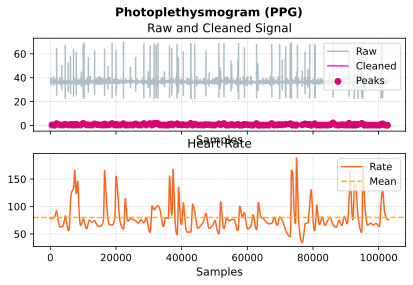

In [6]:
signals, info = nk.ppg_process(s1_train_data[0][0]["bvp"], sampling_rate=1000)
nk.ppg_plot(signals)
print(info)

In [7]:
print(signals.head)

<bound method NDFrame.head of         PPG_Raw  PPG_Clean   PPG_Rate  PPG_Peaks
0        36.728   0.066435  78.112764        0.0
1        36.796   0.065656  78.112764        0.0
2        36.385   0.064795  78.112764        0.0
3        36.390   0.063852  78.112764        0.0
4        36.515   0.062829  78.112764        0.0
...         ...        ...        ...        ...
103046   36.505  -0.000682  76.335878        0.0
103047   36.065  -0.000610  76.335878        0.0
103048   36.195  -0.000540  76.335878        0.0
103049   36.283  -0.000474  76.335878        0.0
103050   36.370  -0.000412  76.335878        0.0

[103051 rows x 4 columns]>


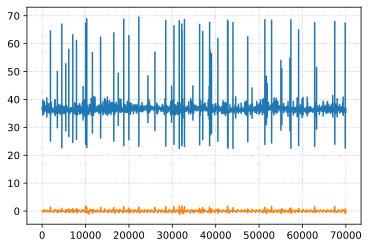

In [8]:
nsamples = 70000
nanno = nsamples // 50
plt.plot(signals["PPG_Raw"].iloc[:nsamples])
plt.plot(signals["PPG_Clean"].iloc[:nsamples])

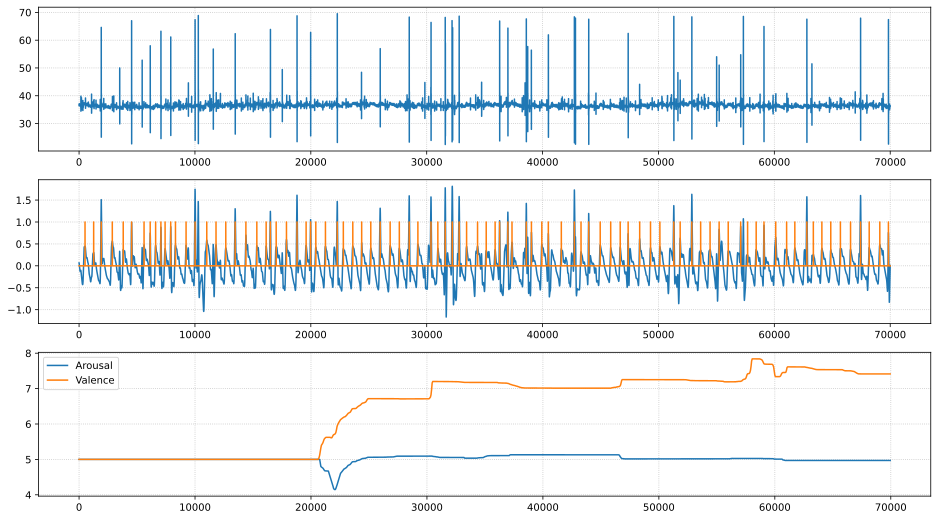

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,9))

ax1.plot(signals["PPG_Raw"].iloc[:nsamples])
ax2.plot(signals["PPG_Clean"].iloc[:nsamples])
ax2.plot(signals["PPG_Peaks"].iloc[:nsamples])
ax3.plot(s1_anno.index[:nanno], s1_anno["arousal"].iloc[:nanno])
ax3.plot(s1_anno.index[:nanno], s1_anno["valence"].iloc[:nanno])
ax3.legend(["Arousal", "Valence"])


(array([[2.61162288e-03, 1.94431843e-02, 3.41181016e-06, ...,
         2.04023753e-04, 9.47201108e-03, 1.35533371e-02],
        [1.21138652e-03, 1.34848453e-02, 1.65608935e-02, ...,
         1.17547036e-03, 5.16365688e-03, 3.21120843e-02],
        [7.58120781e-05, 2.60519114e-04, 3.44632309e-03, ...,
         1.10650860e-05, 1.39342786e-05, 9.11968573e-03],
        ...,
        [1.82369743e-18, 1.31440528e-18, 8.32223987e-20, ...,
         2.79284985e-19, 7.07659970e-18, 1.20362346e-17],
        [4.96031172e-19, 1.11975812e-18, 3.77311138e-20, ...,
         8.06473319e-20, 1.80307504e-18, 8.61329147e-18],
        [2.72323116e-20, 5.27496693e-19, 1.22143443e-20, ...,
         7.71085357e-21, 2.39059380e-20, 3.73668230e-18]]),
 array([  0.     ,   3.90625,   7.8125 ,  11.71875,  15.625  ,  19.53125,
         23.4375 ,  27.34375,  31.25   ,  35.15625,  39.0625 ,  42.96875,
         46.875  ,  50.78125,  54.6875 ,  58.59375,  62.5    ,  66.40625,
         70.3125 ,  74.21875,  78.125  ,  8

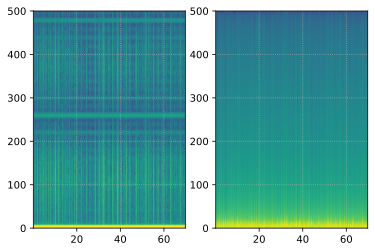

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.specgram(signals["PPG_Raw"].iloc[:nsamples], Fs=1000)
ax2.specgram(signals["PPG_Clean"].iloc[:nsamples], Fs=1000)

In [11]:
analyze_signal = nk.ppg_analyze(signals)
print(analyze_signal)

   PPG_Rate_Mean  HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  \
0      80.016429  768.120301  231.241545         NaN         NaN         NaN   

   HRV_SDNNI2  HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD  ...  HRV_SampEn  \
0         NaN         NaN         NaN  332.035903  ...    1.765373   

   HRV_ShanEn  HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD  \
0    6.874831     1.497757  1.028095   1.382416    1.811946  1.716708   

    HRV_HFD   HRV_KFD   HRV_LZC  
0  1.940013  3.446715  1.167039  

[1 rows x 90 columns]


In [12]:
import sklearn
print(sklearn.__version__)

1.2.1
